# Algoritmos de Alisamiento Exponencial

- Los métodos de previsión se basan en la idea de que las observaciones pasadas contienen información sobre el patrón de comportamiento de la serie de tiempo.

- El algoritmo de alisamiento exponencial intenta tratar este problema. 

- Los algoritmos no tienen un desarrollo probabilístico que pruebe su eficiencia, pero en la práctica son muy útiles por su simplicidad y eficiencia computacional.




## Suavizado exponencial: 

- Técnica para suavizar datos de series de tiempo utilizando una función de ventana exponencial. 

- Difiere  del promedio móvil simple, con el tiempo las funciones exponenciales asignan pesos exponencialmente decrecientes. 
  + Los pesos mayores se asignan a los valores u observaciones recientes, mientras que los pesos menores se asignan a los valores u observaciones más antiguos. 
  
- Entre muchas funciones de ventana, en el procesamiento de señales, la función de suavizado exponencial generalmente se aplica para suavizar datos donde actúa como un filtro de paso bajo para eliminar el ruido de alta frecuencia. 
  





## Suaviamiento exponencial simple - **SES** (simple exponencial smoothing)

Este procedimiento es adecuado cuando los datos no tienen tendencia o patrón estacional. Los pesos de cada observación son determinados por un parámetro de suavizamiento $\alpha$. 

Para un conjunto de datos con $T$ observaciones , calculamos el valor predicho $\hat{y}_{t+1}$, el cual estará basado en $y_1$ a través de $y_t$ de la siguiente forma:

$$\hat{y}_{t+1}=\alpha y_t+\alpha(1-\alpha)y_{t−1}+...+\alpha(1−\alpha)^{t−1}y_1$$


Donde:

- $0< \alpha < 1$. 
- $\alpha$ puede ser visto como una tasa de aprendizaje. 

- Valores cercanos a cero son considerados como aprendizaje lento ya que se da más peso a información histórica
- Valores cercanos a 1 son considerados como aprendizaje rápido porque el algoritmo da más peso a las observaciones recientes.


In [48]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

"C:\Users\wsand\Documents\GitHub\Series-de-Tiempo\CUADERNOS\airpassengers.csv"

In [49]:
airline = pd.read_csv("C:/Users/wsand/Documents/GitHub/Series-de-Tiempo/CUADERNOS/airpassengers.csv", parse_dates=True, sep=";")
airline

,Unnamed: 0,x
0,1,112
1,2,118
2,3,132
3,4,129
4,5,121
...,...,...
139,140,606
140,141,508
141,142,461
142,143,390


In [50]:
date_range = pd.date_range(start="1949-1", end="1961-1", freq='M')
date_range

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [51]:
airline.index=date_range

In [52]:
airline.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
airline.rename(columns={"x": "Cantidad de pasajeros"}, inplace=True)

In [53]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-31 to 1960-12-31
Freq: M
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Cantidad de pasajeros  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<Axes: title={'center': 'Cantidad de Pasajeros'}>

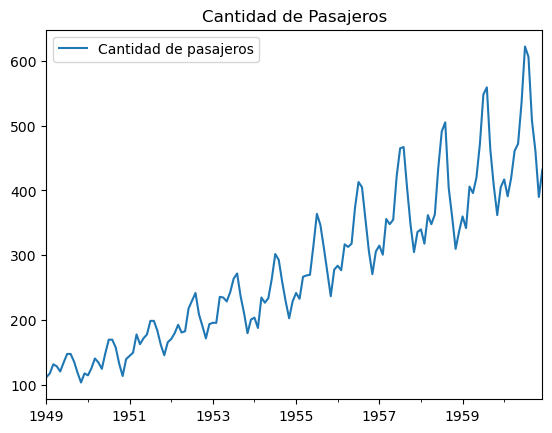

In [57]:
# plotting the original data
airline[['Cantidad de pasajeros']].plot(title='Cantidad de Pasajeros')

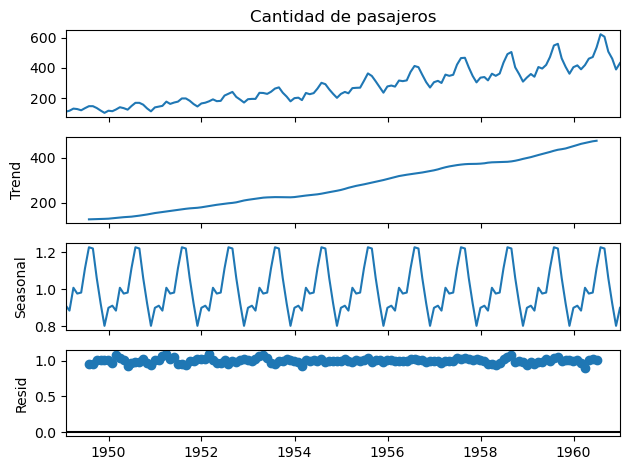

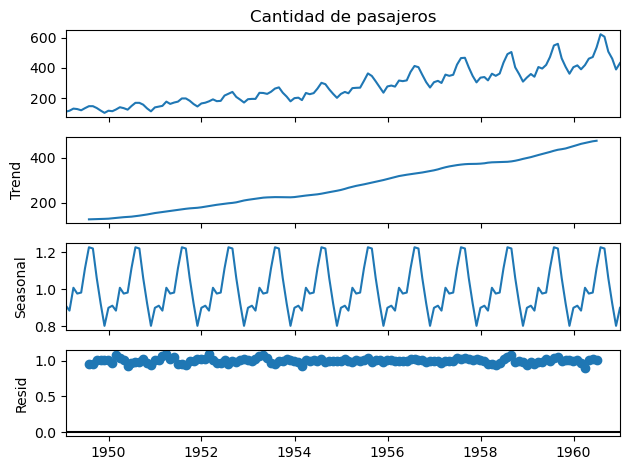

In [63]:
decompose_result = seasonal_decompose(airline["Cantidad de pasajeros"],model="multiplicative")
decompose_result.plot()

Ajuste de los datos con suavizado exponencial de Holt-Winters
Ahora ajustaremos estos datos al suavizado exponencial simple, doble y triple respectivamente, y veremos cómo funciona.

Antes de comenzar con los modelos, primero definiremos el coeficiente de peso Alfa y el Período de Tiempo. También configuramos la frecuencia DateTime a un nivel mensual.

In [69]:
# Establezca la frecuencia del índice de fecha y hora como Inicio mensual como lo indican los datos aerolínea.index.freq = 'MS'
# Establezca el valor de Alfa y defina m (Período de tiempo) 
m = 12 
alpha = 1/(2*m)

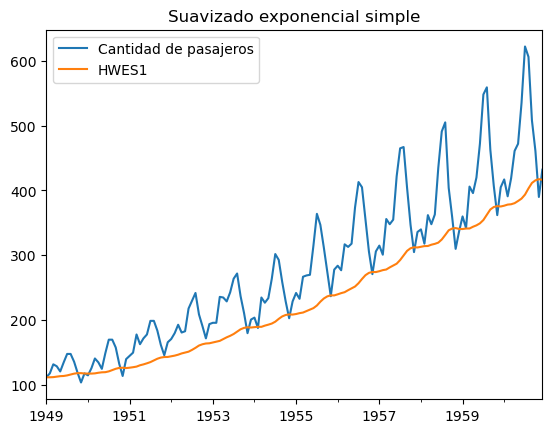

In [72]:
airline["HWES1"] = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
airline[["Cantidad de pasajeros","HWES1"]].plot(title="Suavizado exponencial simple");

In [75]:
import seaborn as sns
sns.set_theme()

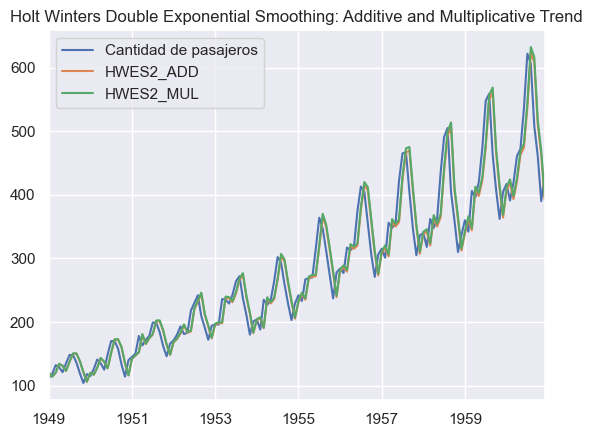

In [76]:
airline["HWES2_ADD"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="add").fit().fittedvalues
airline["HWES2_MUL"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="mul").fit().fittedvalues
airline[["Cantidad de pasajeros","HWES2_ADD","HWES2_MUL"]].plot(title="Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend");

c:\Users\wsand\anaconda31\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


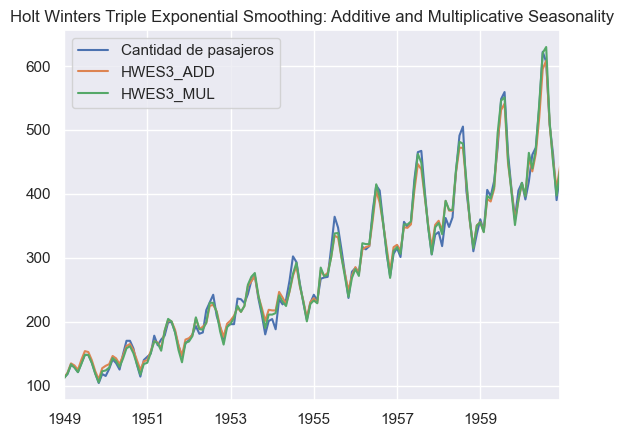

In [78]:
#Triple HWES
airline["HWES3_ADD"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="add",seasonal="add",seasonal_periods=12).fit().fittedvalues
airline["HWES3_MUL"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues
airline[["Cantidad de pasajeros","HWES3_ADD","HWES3_MUL"]].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality");

In [79]:
# Split into train and test set
train_airline = airline[:120]
test_airline = airline[120:]

In [80]:
test_airline

,Cantidad de pasajeros,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
1959-01-31,360,340.553729,338.934275,342.740670,355.593981,355.105777
1959-02-28,342,341.363991,361.954484,366.162463,340.724140,339.828696
1959-03-31,406,341.390491,344.157599,348.058370,391.788162,396.568913
1959-04-30,396,344.082554,407.754768,412.758291,387.844495,392.257736
1959-05-31,420,346.245781,398.121584,402.962931,407.527918,411.111116
1959-06-30,472,349.318873,421.955595,427.209646,482.298241,494.682616
1959-07-31,548,354.430587,473.819745,479.976829,530.934576,545.696896
1959-08-31,559,362.495979,549.706446,557.187594,540.812923,550.596203
1959-09-30,463,370.683647,561.031805,568.715959,447.116494,453.206373
1959-10-31,407,374.530161,465.558677,471.584076,405.344874,402.161159


c:\Users\wsand\anaconda31\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


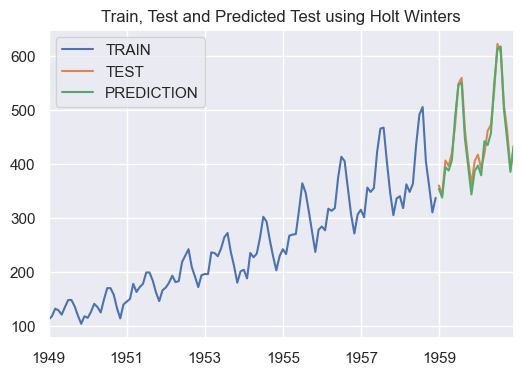

In [84]:
fitted_model = ExponentialSmoothing(train_airline["Cantidad de pasajeros"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_airline["Cantidad de pasajeros"].plot(legend=True,label="TRAIN")
test_airline["Cantidad de pasajeros"].plot(legend=True,label="TEST",figsize=(6,4))
test_predictions.plot(legend=True,label="PREDICTION")
plt.title("Train, Test and Predicted Test using Holt Winters");

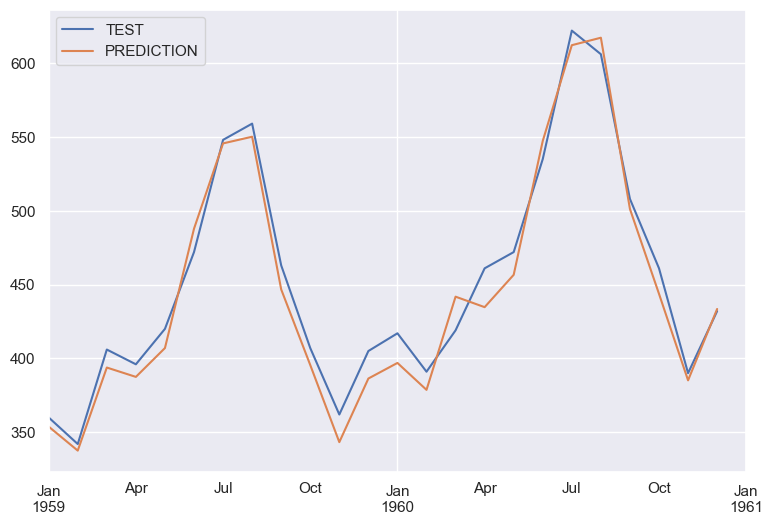

In [87]:
test_airline["Cantidad de pasajeros"].plot(legend=True,label="TEST",figsize=(9,6))
test_predictions.plot(legend=True,label="PREDICTION",xlim=["1959-01-01","1961-01-01"]);

In [91]:
test_predictions

1959-01-31    353.807513
1959-02-28    337.555864
1959-03-31    393.806400
1959-04-30    387.476671
1959-05-31    407.014077
1959-06-30    487.824556
1959-07-31    545.611041
1959-08-31    550.129056
1959-09-30    446.734885
1959-10-31    395.510993
1959-11-30    343.290040
1959-12-31    386.375565
1960-01-31    396.934254
1960-02-29    378.701639
1960-03-31    441.808735
1960-04-30    434.707455
1960-05-31    456.626338
1960-06-30    547.287068
1960-07-31    612.117335
1960-08-31    617.186065
1960-09-30    501.188844
1960-10-31    443.721106
1960-11-30    385.134773
1960-12-31    433.472131
Freq: M, dtype: float64

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(test_airline["Cantidad de pasajeros"],test_predictions)
#mean_squared_error(test_airline["Cantidad de pasajeros"],test_predictions)

12.38061275912318